## Neural Network ##


Neural Networks are a class of algorithms inspired by the structure and functions of the brain. They are popularly used in applications like image recognition, and natural language processing, and other modeling of complex and non linear relationships.

Neural Networks consist of layers of interconnected nodes where every connection holds an associated weight. 

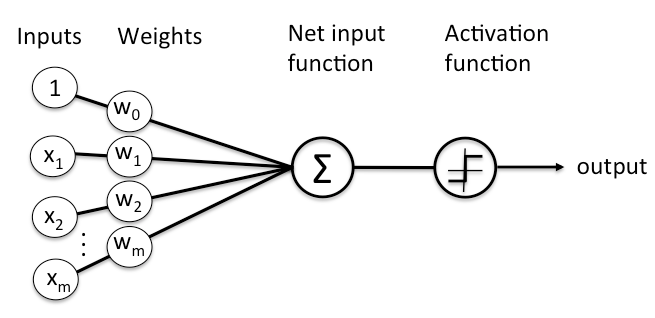

We will perform image classficiation on the Fashion MNIST dataset, which contains 28x28 grayscale images of clothing items across 10 classes.

In [4]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) = keras.datasets.fashion_mnist.load_data()

In [5]:

print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[0]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0  

We can look at the image of one of the matrices:

train_y[0] = 9 



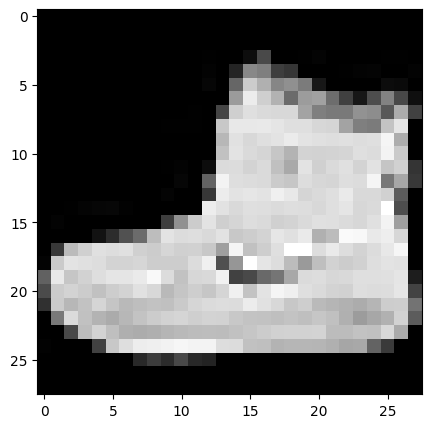

In [6]:
print(f"{train_y[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[0], cmap="gray")
plt.show()

## Normalize and Preprocess Data
Each 28x28 image is flattened into a 784x1 column vector.
Labels (train_y, test_y) are one-hot encoded into 10×1 vectors for multi-class classification.

In [7]:
# Scale the data for training. 
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   

# Do the same for the testing data 
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)
    

## Neural Network Functions
Next we will define some functions we will need for our network. 
- sigmoid(z): Activation function.

- d_sigmoid(z): Derivative of sigmoid.

- mse(a, y): Mean squared error between predicted and true labels.

In [8]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

### Weight Initialization
Initializes weights and biases for each layer using scaled random values.

In [9]:
def initialize_weights(layers = [784, 60, 60, 10]):
    # The following Python lists will contain numpy matrices
    # connected the layers in the neural network 
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):

        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

### Forward Pass
Compute activations layer by layer using matrix multiplication and the sigmoid function defined earlier.



In [14]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

W, B = initialize_weights()

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 0
Target Label: np.argmax(yi) = 9
mse(y_hat, yi) = 1.3898328627703072


### Prediction Function & MSE
Now let's write the function for making a prediction on a random data point.
It predicts the label class by taking the argmax of the final activation output.

The MSE function computes mean squared error over the entire dataset.

In [15]:
def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")
    

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [16]:
print(f"MSE(W, B, flat_train_X, onehot_train_y) = {MSE(W, B, flat_train_X, onehot_train_y)} \n")

random_experiment(W, B, flat_train_X, onehot_train_y)

MSE(W, B, flat_train_X, onehot_train_y) = 1.4905108739088044 

Actual label: 1
Predicted label: 0


## Building and Training the Network

init: Initializes layer structure and weights.

train: Runs stochastic gradient descent with backpropagation:

- For each epoch, computes output error at each layer.

- Propagates the error backward and updates weights using gradients.

- Tracks the cost (MSE) over epochs.

In [19]:

class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        # Print the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

### Initial Evaluation before training

Before trianing the network we perform an initial evaluation to establish a performance baseline. We first calculate the mean squared error (MSE) using randomly initialized weights and biases. As expected, the MSE is quite high, indicating that the network has not yet learned meaningful patterns from the data.

Next, we make a prediction on a randomly selected test image. This prediction is likely to be inaccurate since the model has not had any training yet. Displaying the image alongside its predicted and actual label will show visually the network's performance prior to learning.

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.322318575375295 

predicted digit is: 0
actual digit is: 2


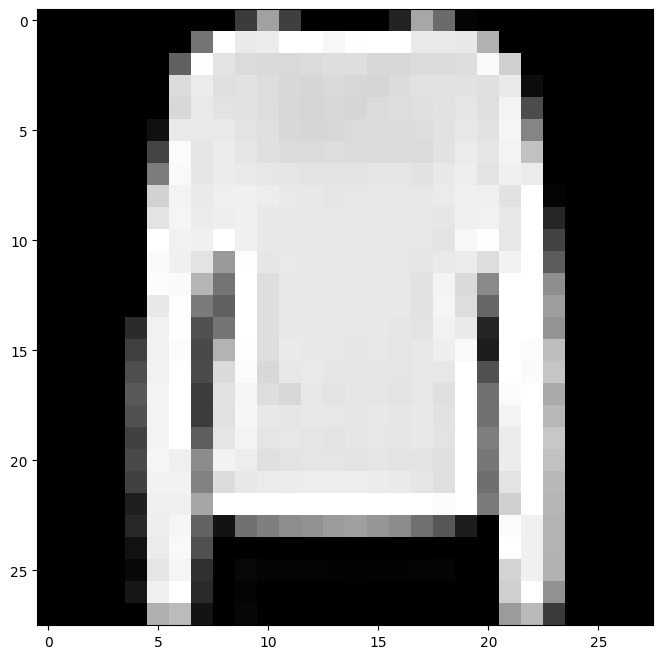

In [20]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 120, 145, 120, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

As we can see the predicted digit was 0 - which corresponds to the class T-shirt/top, but this is actually 2 - a Pullover!
### Training our neural network
We will now train the neural network using stochastic gradient descent. The `train` method will update the network's weights and biases after each individual training instance. 
Below, we will see the MSE/cost after each epoch to watch how the network improves over time.

In [21]:
# Train the network with stochastic gradient descent!
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.322318575375295
1-Epoch Cost = 0.1291972980495266
2-Epoch Cost = 0.1109815554833111
3-Epoch Cost = 0.10240959864793316
4-Epoch Cost = 0.09526132243489095


As we can see, the error got smaller every epoch! The train phase allowed the network to learn the patterns in the training data and minimize prediction error by adjusting parameters internally based on the calculated gradients.

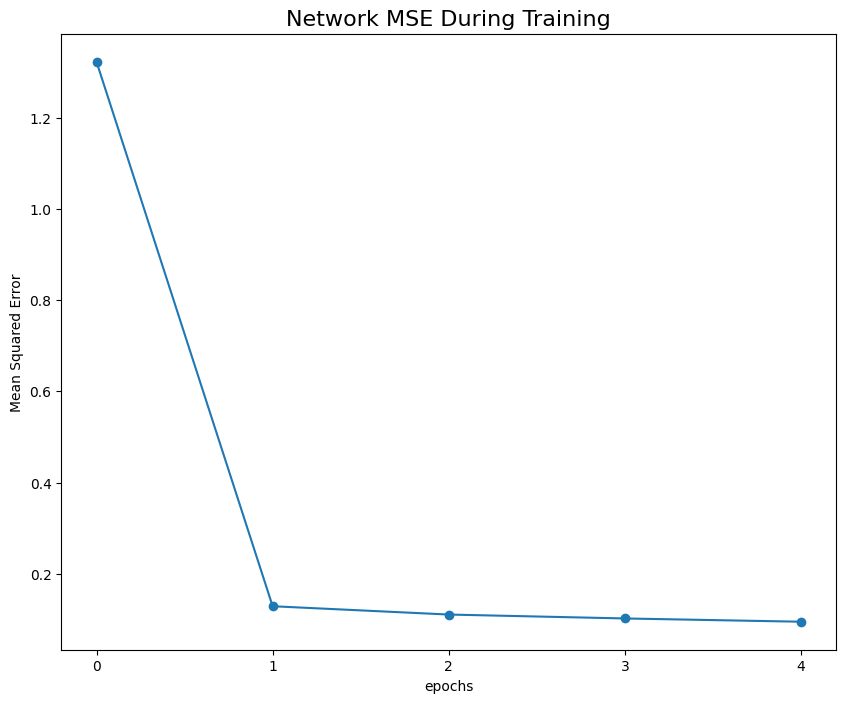

In [22]:
# Visualize the mean squared error over the training process 
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()


In the above plot, we can see a decreasing error trend as we go through epochs. This indicates successful learning and convergence of our model.

## Post-Training: Making Predictions
Now, to evaluate our network's performance after the trianing phase, we will make a prediction on a new, randomly selected test image.

predicted digit is: 8
actual digit is: 8


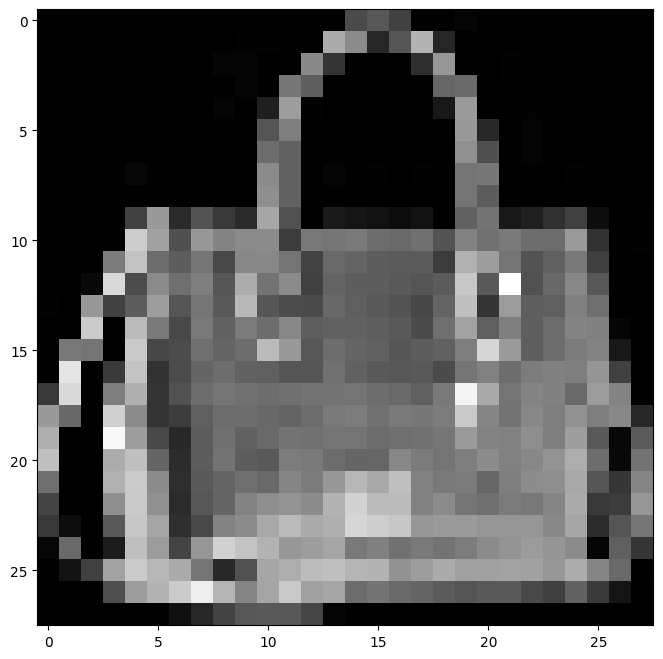

In [23]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 4
actual digit is: 4


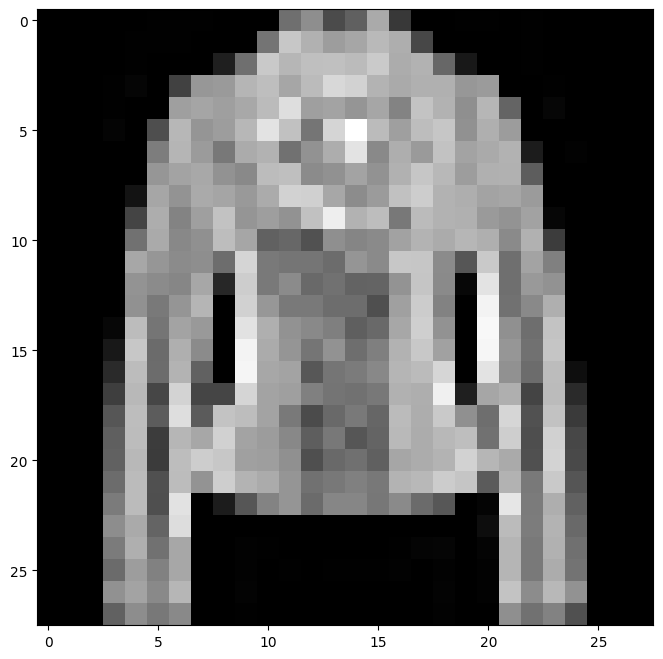

In [24]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

This time, the prediction is based on the learned weights and biases from the training phase. Our netowrk correctly identified a bag (digit 8) and a coat (digit 4)!
We just showed a practical check on how well the neural network generalized to new data!

---
# Final Evaluation #

Let's now calculate the classification percentage on the testing data for our trained dense neural network, to see accuracy and also construct the confusion matrix.


In [ ]:
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)


0.8523

<Figure size 800x800 with 0 Axes>

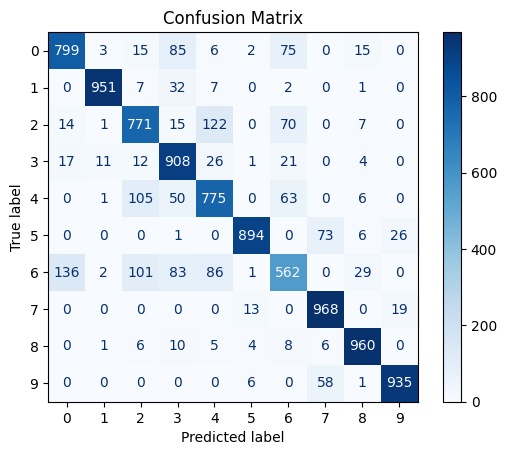

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict all test labels
predictions = [net.predict(xi) for xi in flat_test_X]
true_labels = [np.argmax(y) for y in onehot_test_y]

# Generate and display confusion matrix
cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


To asssess the model's performance, we computed the accuracy percentage of 85.23% and produced a confusion matrix. The confusion matrix summarizes the prediction performance across all classes, showing which digits are commonly misclassified.

The overall test accuracy of 85.23 demonstrates that our simple feedforward model was capable of capturing meaningful data patterns.

All in all, we can see that most predictions match true labels, demonstrated by both the high accuracy rate and the diagonal of the confusion matrix showing very high numbers of true positives. However, some classes do show confusion between certain types of similar clothing like shirts vs T-Shirts, and sneakers vs ankleboots. 